In [2]:
import numpy as np

def loadDataSet():
    x = []
    y = []
    fr = open(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch05\testSet.txt')
    for line in fr.readlines():#遍历每一行
        line_x = line.strip().split()#去掉每行的换行符并以空格切分
        x.append([1.0, float(line_x[0]), float(line_x[1])])#x0=1,
        y.append([int(line_x[2])])
    return np.mat(x),np.mat(y)#返回矩阵形式

x,y = loadDataSet()
print(x.shape)   # 100,3
print(y)

(100, 3)
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]


In [2]:

def sigmoid(x):
    return 1.0 / (1 + np.exp(- x))
# print(sigmoid(0)) #  输出 0.5 验证通过

# 梯度上升优化算法
def gradAscent(x, y):
    m, n = np.shape(x)#m=100.n=3
    alpha = 0.001
    maxCycle = 500#最大迭代500次
    weights = np.ones((n, 1))  # 3行1列
    for k in np.arange(maxCycle):
        h = sigmoid(x * weights)
        error = y - h
        weights = weights + alpha * x.T * error  # 这是推导之后的结果，详细推导过程见上面的链接
    return weights


x,y = loadDataSet()
print(gradAscent(x, y))


[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


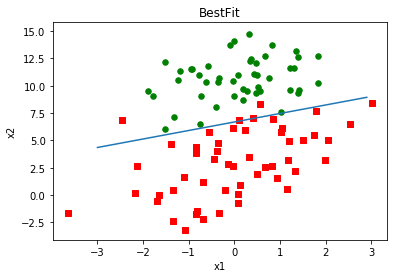

In [3]:
# 画出决策边界

import matplotlib.pyplot as plt

def plotBestFit(weights):
    x, y = loadDataSet()#文本转化为矩阵
    xarr = np.array(x)#创建数组(100行3列),大小和a一样
    n = np.shape(x)[0]#n=100
    x1 = []; y1 = []
    x2 = []; y2 = []
    for i in np.arange(n):#样本分类
        if int(y[i]) == 1:#判断
            x1.append(xarr[i,1]); y1.append(xarr[i,2])
        else:
            x2.append(xarr[i,1]); y2.append(xarr[i,2])
    #开始画图 找出x1和x2之间的关系
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x1, y1, s = 30, c = 'r', marker = 's')
    ax.scatter(x2, y2, s = 30, c = 'g')
    
    a = np.arange(-3.0, 3.0, 0.1)#x1
    b = (-weights[0] - weights[1] * a) / weights[2]#x2
    ax.plot(a, b.T)#b的转置
    plt.title('BestFit')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

x,y = loadDataSet()
weights = gradAscent(x, y)
print(weights)
plotBestFit(weights)

In [6]:
np.ones(3)

array([ 1.,  1.,  1.])

100 3
[[ 1.01702007]
 [ 0.85914348]
 [-0.36579921]]
100 3


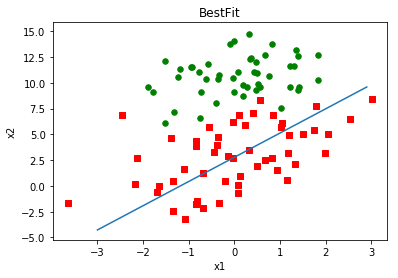

In [7]:
# 随机梯度上升

def randgradAscent(x, y):
    m, n = np.shape(x)
    print(m, n)
    alpha = 0.01#步长
    weights = np.ones(n)#一行三列
    for i in np.arange(m):#每次只更新一个值
        h = sigmoid(np.sum(x[i] * weights))
        error = y[i] - h
        weights = weights + alpha * error * x[i]#迭代出新的w
    return (np.mat(weights)).T

x,y = loadDataSet()
#输出最佳参数
#print(randgradAscent(np.array(x), np.array(y))) 

weights = randgradAscent(np.array(x), np.array(y))
# 画出决策边界
plotBestFit(weights)

[[ 14.41381384]
 [  1.00077266]
 [ -1.96064526]]


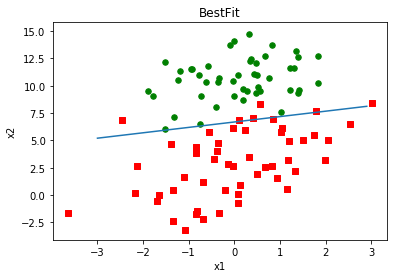

In [9]:
# 改进的随机梯度上升算法

def randgradAscent1(x, y, cycle = 150):
    m, n = np.shape(x)
    weights = np.ones(n)
    for j in np.arange(cycle):
        dataindex = np.arange(m)#100
        for i in np.arange(m):
            alpha = 4 / (1.0 + j + i) + 0.01#步长发生变化，发现步长变化越来越缓慢
            randindex = int(np.random.uniform(0, len(dataindex)))#0~100中随机选取一个值
            h = sigmoid(np.sum(x[randindex] * weights))
            error = y[randindex] - h
            weights = weights + alpha * error * x[randindex]
            dataindex = dataindex.tolist()#转化为list类型
            del(dataindex[randindex])#删除该随机数对应的数据
            dataindex = np.array(dataindex)#再创建一个数组
    return np.mat(weights).T#将结果转化为矩阵形式
    
x,y = loadDataSet()
#print(randgradAscent1(np.array(x), np.array(y))) 

weights = randgradAscent1(np.array(x), np.array(y))
# 画出决策边界
plotBestFit(weights)

In [10]:
#该函数以特征向量和回归系数作为输入来计算对应的sigmoid值
def classifyVector(x, weights):
    prob = sigmoid(np.sum(x * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
#该函数用于打开测试集和训练集，并对数据进行格式化处理    
def colicTest():
    frTrain = open(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch05\horseColicTraining.txt')
    frTest = open(r'E:\Program Files\Machine Learning\机器学习实战及配套代码\machinelearninginaction\Ch05\horseColicTest.txt')
    #定义两个空数组，一个用来放数据集，一个用来放标签
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')#以制表符分割开来
        lineArr = []
        for i in np.arange(21):#共21个特征
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))#一个标签
    #利用改进的随机梯度上升算法训练出最佳的回归系数 迭代500次
    trainWeights = randgradAscent1(np.array(trainingSet), np.array(trainingLabels), 500)
    #导入测试集并计算分类错误率
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in np.arange(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights) != int(currLine[21])):
            errorCount += 1#计算测试错的总和
            
    errorRate = (float(errorCount) / numTestVec)#错误率
    print("the error rate of this test is: %f" % errorRate )
    return errorRate


#调用colocTest()函数10次，并求结果的平均值
def multiTest():
    numTests = 10; errorSum = 0.0
    for k in np.arange(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" %(numTests, errorSum / float(numTests)))


multiTest()


D:\python software\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is: 0.358209
the error rate of this test is: 0.402985
the error rate of this test is: 0.358209
the error rate of this test is: 0.402985
the error rate of this test is: 0.313433
the error rate of this test is: 0.373134
the error rate of this test is: 0.313433
the error rate of this test is: 0.328358
the error rate of this test is: 0.402985
the error rate of this test is: 0.358209
after 10 iterations the average error rate is: 0.361194


In [5]:
import numpy as np
x = []
x.append([1.0,2.0,3.0])
x.append([2.0,4.0,6.0])
print(x)
print(np.mat(x))

[[1.0, 2.0, 3.0], [2.0, 4.0, 6.0]]
[[ 1.  2.  3.]
 [ 2.  4.  6.]]


In [3]:
import numpy as np
x,y = loadDataSet()
xarr = np.array(x)
print(xarr)

[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.53862000e+00]
 [  1.00000000e+00  -1.32237100e+00   7.15285300e+00]
 [  1.00000000e+00   4.23363000e-01   1.10546770e+01]
 [  1.00000000e+00   4.06704000e-01   7.06733500e+00]
 [  1.00000000e+00   6.67394000e-01   1.27414520e+01]
 [  1.00000000e+00  -2.46015000e+00   6.86680500e+00]
 [  1.00000000e+00   5.69411000e-01   9.54875500e+00]
 [  1.00000000e+00  -2.66320000e-02   1.04277430e+01]
 [  1.00000000e+00   8.50433000e-01   6.92033400e+00]
 [  1.00000000e+00   1.34718300e+00   1.31755000e+01]
 [  1.00000000e+00   1.17681300e+00   3.16702000e+00]
 [  1.00000000e+00  -1.78187100e+00   9.09795300e+00]
 [  1.00000000e+00  -5.66606000e-01   5.74900300e+00]
 [  1.00000000e+00   9.31635000e-01   1.58950500e+00]
 [  1.00000000e+00  -2.42050000e-02   6.15182300e+00]
 [  1.00000000e+00  -3.64530000e-02   2.69098800e+00]
 [  1.00000000e+00  -1.96949